# Hand written digit recongnition

### Part 3 of the series

In [1]:
import torch, torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [2]:
# Download MNSIT dataset, skip if downloaded
# dataset = MNIST(root="data/", download = True)

In [3]:
dataset = MNIST(root="./data/", train=True)
dataset,dataset[0]

C:\Users\jangi\Documents\GitHub\PyTorch-Basics\env\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data/
     Split: Train,
 (<PIL.Image.Image image mode=L size=28x28 at 0x1923BD812B0>, 5))

In [4]:
dataset = MNIST(root="./data/",
                train=True,
               transform=transforms.ToTensor())
dataset,dataset[0]

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.00

In [5]:
img_tensor,label=dataset[70]
label,img_tensor.shape

(1, torch.Size([1, 28, 28]))

1x28x28 size tensor mean that the first index represents only grayscale nature of the image. if it was rgb photo we must see
3x28x28 size tensor. We try to plot the photo now. We must have only 2D tensor to plot correctly.

label = 1


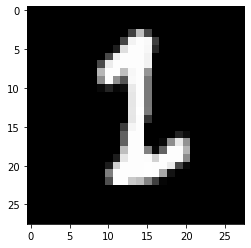

In [6]:
plt.imshow(img_tensor[0,:],cmap="gray")
print(f"label = {label}")

## Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [7]:
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [8]:
batch_size = 128
train_loader = DataLoader(train_ds, batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size, shuffle=True)

for x,y in train_loader:
    # print(f"{x}\n{y}")
    print(x.shape)
    print(y.shape)
    break;

torch.Size([128, 1, 28, 28])
torch.Size([128])


As you can see we have 128 images with 28x28 pixel and 128 label datas. We need to convet these 4Dimension tensor 128x1x28x28 into 2Dimesnional tesnor. We can achieve that by reshape command. We will introduce that further

In [9]:
# We first make our use defined class based on nn model
# This is the most tricky part understand it
# We extend the mnn.Module class from pytorch do define
# a custom model
class MnistModel(nn.Module):
    def __init__(self,no_input_vars,no_target_vars):
        # number of input variables 
        # number of target/output variables
        super().__init__()
        self.linear = nn.Linear(no_input_vars,no_target_vars)
    def forward(self,xb):
        # We need to transform xb to have 784 columns
        # whatever be the batch size
        # -1 means it will be determined automatically
        xb = xb.reshape(-1,784) 
        out = self.linear(xb)
        return out

In [10]:
no_input_vars = 28*28
no_target_vars = 10
model = MnistModel(no_input_vars,no_target_vars)
model.parameters

<bound method Module.parameters of MnistModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)>

In [11]:
print(model.linear.weight.shape,model.linear.bias.shape)

torch.Size([10, 784]) torch.Size([10])


In [12]:
for images, labels in train_loader:
    outputs = model(images)
    break
print("Sample outputs :\n", outputs[0:2])

Sample outputs :
 tensor([[-0.1264, -0.0995,  0.0584,  0.0292,  0.2642,  0.0879,  0.1107, -0.0139,
          0.0878,  0.0755],
        [-0.0558,  0.0263,  0.0501, -0.1119, -0.0730, -0.0794,  0.0213,  0.1041,
         -0.0446,  0.1931]], grad_fn=<SliceBackward>)


We'd like the outputs to represent probabilities here. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case here (you may check). 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

##### Well the trick is fairly simple we just need to make all the numbers positive first. and then devide each number by sum of all the number. To make the numbers postive we can use exponential function.

The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.

In [13]:
probs = F.softmax(outputs,dim=1)
print("output",outputs[2])
print("probbs",probs[2])
print("sumprb",torch.sum(probs[2]))

output tensor([-0.2256,  0.1071,  0.0651, -0.0100,  0.1150,  0.0955,  0.0335,  0.0468,
        -0.1275,  0.1672], grad_fn=<SelectBackward>)
probbs tensor([0.0772, 0.1077, 0.1033, 0.0958, 0.1086, 0.1065, 0.1001, 0.1014, 0.0852,
        0.1144], grad_fn=<SelectBackward>)
sumprb tensor(1.0000, grad_fn=<SumBackward0>)


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [14]:
max_probs,preds = torch.max(probs,dim=1)
preds,labels

(tensor([4, 9, 9, 7, 4, 7, 4, 4, 2, 2, 6, 6, 4, 7, 6, 2, 7, 4, 9, 6, 2, 9, 2, 9,
         4, 4, 7, 7, 4, 4, 2, 7, 9, 9, 7, 4, 4, 4, 4, 7, 4, 4, 4, 7, 4, 2, 7, 2,
         2, 4, 2, 6, 4, 6, 4, 1, 4, 9, 8, 4, 2, 4, 2, 9, 2, 2, 7, 4, 4, 4, 7, 9,
         9, 4, 9, 2, 1, 4, 2, 9, 9, 9, 4, 4, 7, 4, 5, 3, 9, 7, 2, 4, 9, 2, 4, 1,
         7, 9, 7, 4, 6, 9, 3, 7, 4, 4, 1, 9, 3, 3, 4, 4, 4, 5, 4, 6, 4, 4, 4, 9,
         4, 5, 4, 9, 7, 4, 2, 3]),
 tensor([4, 3, 1, 0, 5, 7, 0, 1, 1, 7, 1, 6, 2, 3, 1, 2, 5, 0, 2, 8, 7, 4, 1, 7,
         0, 3, 2, 7, 4, 2, 6, 5, 6, 7, 9, 7, 4, 7, 5, 5, 7, 7, 4, 9, 8, 3, 9, 3,
         7, 6, 1, 1, 0, 1, 2, 9, 2, 7, 5, 8, 7, 3, 1, 2, 6, 0, 8, 0, 2, 0, 3, 1,
         9, 5, 9, 7, 3, 2, 1, 2, 4, 2, 7, 6, 9, 9, 5, 5, 6, 3, 0, 1, 3, 2, 0, 7,
         7, 4, 7, 6, 1, 8, 5, 3, 5, 8, 8, 9, 2, 5, 1, 6, 8, 8, 7, 4, 1, 0, 8, 5,
         1, 1, 9, 4, 4, 2, 4, 6]))

Since the numbers are completely different. We need to adjust the weigths and biases

## Evaluation Metric and Loss Function

Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.## Evaluation Metric and Loss Function

In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [16]:
accuracy(outputs, labels)

tensor(0.1172)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [17]:
loss_fn = F.cross_entropy

In [18]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3155, grad_fn=<NllLossBackward>)


## Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.



In [19]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [20]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [21]:
class MnistModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel(no_input_vars,no_target_vars)

In [22]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3265864849090576, 'val_acc': 0.06160996854305267}

In [23]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9548, val_acc: 0.6155
Epoch [1], val_loss: 1.6815, val_acc: 0.7103
Epoch [2], val_loss: 1.4788, val_acc: 0.7489
Epoch [3], val_loss: 1.3281, val_acc: 0.7743
Epoch [4], val_loss: 1.2081, val_acc: 0.7953


In [24]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1168, val_acc: 0.8078
Epoch [1], val_loss: 1.0435, val_acc: 0.8172
Epoch [2], val_loss: 0.9797, val_acc: 0.8218
Epoch [3], val_loss: 0.9321, val_acc: 0.8269
Epoch [4], val_loss: 0.8890, val_acc: 0.8314


In [25]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8547, val_acc: 0.8330
Epoch [1], val_loss: 0.8252, val_acc: 0.8380
Epoch [2], val_loss: 0.7931, val_acc: 0.8412
Epoch [3], val_loss: 0.7728, val_acc: 0.8413
Epoch [4], val_loss: 0.7494, val_acc: 0.8456


In [26]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7255, val_acc: 0.8492
Epoch [1], val_loss: 0.7117, val_acc: 0.8504
Epoch [2], val_loss: 0.6962, val_acc: 0.8504
Epoch [3], val_loss: 0.6841, val_acc: 0.8513
Epoch [4], val_loss: 0.6676, val_acc: 0.8534


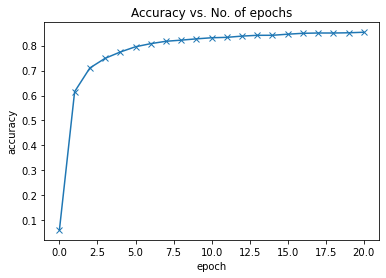

In [27]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 

## Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [28]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [29]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0299, -0.0289,  0.0157,  ...,  0.0341,  0.0114, -0.0243],
                      [ 0.0241, -0.0291, -0.0319,  ..., -0.0053, -0.0208, -0.0021],
                      [ 0.0133, -0.0157,  0.0043,  ...,  0.0357, -0.0166, -0.0005],
                      ...,
                      [-0.0025, -0.0157,  0.0304,  ...,  0.0249, -0.0200, -0.0204],
                      [-0.0041, -0.0230,  0.0018,  ...,  0.0053, -0.0200, -0.0043],
                      [-0.0094,  0.0293, -0.0339,  ...,  0.0016,  0.0352,  0.0357]])),
             ('linear.bias',
              tensor([-0.0492,  0.0751, -0.0336, -0.0345,  0.0474,  0.0060,  0.0243,  0.0407,
                      -0.0809, -0.0203]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [30]:
model2 = MnistModel(no_input_vars,no_target_vars)

In [31]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0289, -0.0142,  0.0325,  ...,  0.0021, -0.0177, -0.0196],
                      [ 0.0286, -0.0336, -0.0123,  ..., -0.0245, -0.0237, -0.0140],
                      [ 0.0197, -0.0135, -0.0258,  ..., -0.0052,  0.0308, -0.0233],
                      ...,
                      [ 0.0282,  0.0191,  0.0263,  ...,  0.0164,  0.0096, -0.0100],
                      [ 0.0313,  0.0232, -0.0090,  ..., -0.0139, -0.0154, -0.0131],
                      [-0.0112,  0.0259,  0.0180,  ..., -0.0246, -0.0049,  0.0061]])),
             ('linear.bias',
              tensor([-0.0159, -0.0017,  0.0101,  0.0318, -0.0298,  0.0274,  0.0098,  0.0137,
                       0.0045, -0.0038]))])

In [33]:
evaluate(model2, val_loader)

{'val_loss': 2.3447999954223633, 'val_acc': 0.05834651738405228}

In [34]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0299, -0.0289,  0.0157,  ...,  0.0341,  0.0114, -0.0243],
                      [ 0.0241, -0.0291, -0.0319,  ..., -0.0053, -0.0208, -0.0021],
                      [ 0.0133, -0.0157,  0.0043,  ...,  0.0357, -0.0166, -0.0005],
                      ...,
                      [-0.0025, -0.0157,  0.0304,  ...,  0.0249, -0.0200, -0.0204],
                      [-0.0041, -0.0230,  0.0018,  ...,  0.0053, -0.0200, -0.0043],
                      [-0.0094,  0.0293, -0.0339,  ...,  0.0016,  0.0352,  0.0357]])),
             ('linear.bias',
              tensor([-0.0492,  0.0751, -0.0336, -0.0345,  0.0474,  0.0060,  0.0243,  0.0407,
                      -0.0809, -0.0203]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [36]:
# test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, val_loader)
result

{'val_loss': 0.6674948334693909, 'val_acc': 0.8541337251663208}

As a final step, we can save and commit our work using the `jovian` library. Along with the notebook, we can also attach the weights of our trained model, so that we can use it later.

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [70]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


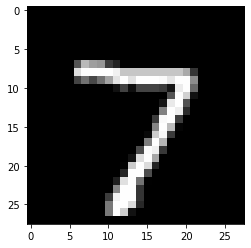

In [71]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [74]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


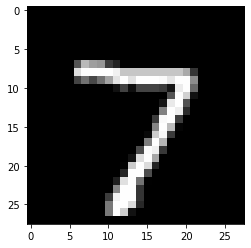

In [75]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


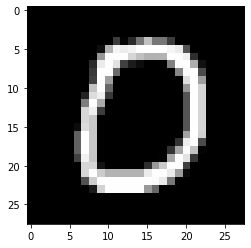

In [76]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


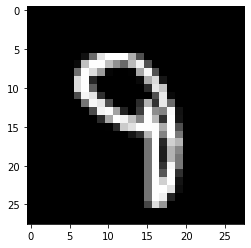

In [77]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


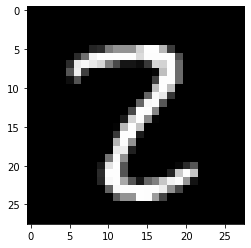

In [78]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [79]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86083984375, 'val_loss': 0.6424765586853027}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

## Exercises

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/02-insurance-linear-regression
* Starter notebook for logistic regression projects: https://jovian.ai/aakashns/mnist-logistic-minimal
* Starter notebook for linear regression projects: https://jovian.ai/aakashns/housing-linear-minimal

Training great machine learning models within a short time takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

## Summary and Further Reading

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 
* Saving and loading model checkpoints to avoid retraining from scratch

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try making the validation set smaller or larger, and see how it affects the model.
* Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
* Try changing the batch size. What happens if you use too high a batch size, or too low?
* Modify the `fit` function to also track the overall loss and accuracy on the training set, and see how it compares with the validation loss/accuracy. Can you explain why it's lower/higher?
* Train with a small subset of the data, and see if you can reach a similar level of accuracy.
* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:
* For a more mathematical treatment, see the popular [Machine Learning](https://www.coursera.org/lecture/machine-learning/classification-wlPeP) course on Coursera. Most of the images used in this tutorial series have been taken from this course.
* The training loop defined in this notebook was inspired from [FastAI development notebooks](https://github.com/fastai/fastai_docs/blob/master/dev_nb/001a_nn_basics.ipynb) which contain a wealth of other useful stuff if you can read and understand the code.
* For a deep dive into softmax and cross entropy, see [this blog post on DeepNotes](https://deepnotes.io/softmax-crossentropy).


With this we complete our discussion of logistic regression, and we're ready to move on to the next topic: [Training Deep Neural Networks on a GPU](https://jovian.ai/aakashns/04-feedforward-nn)!